# Experiment 13

## Implement K-Means Clustering using any given dataset

Centroid 1: [5.77358491 2.69245283]
Centroid 2: [6.81276596 3.07446809]
Centroid 3: [5.006 3.428]


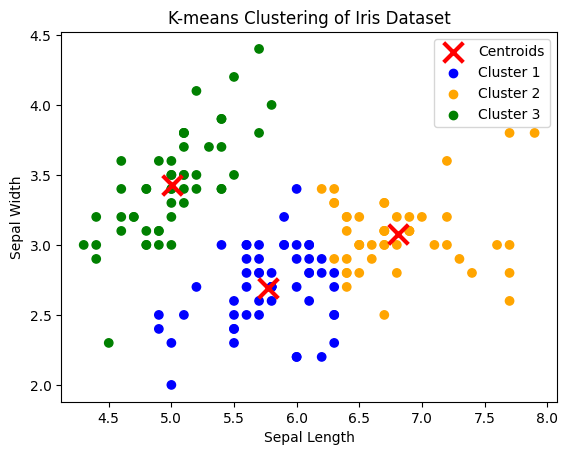

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]

# Fit KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X)

# Get labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print the positions of each centroid
for i, centroid in enumerate(centroids):
    print(f'Centroid {i + 1}: {centroid}')

# Define custom colors for each cluster
colors = ['blue', 'orange', 'green']
cluster_colors = [colors[label] for label in labels]

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_colors)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')

# Adding custom legends for each cluster
for i, color in enumerate(colors):
    plt.scatter([], [], c=color, label=f'Cluster {i + 1}')  # Empty scatter for legend

# Labeling the plot
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()


# Following cells are not required for the Lab experiment

## Performing Elbow Method

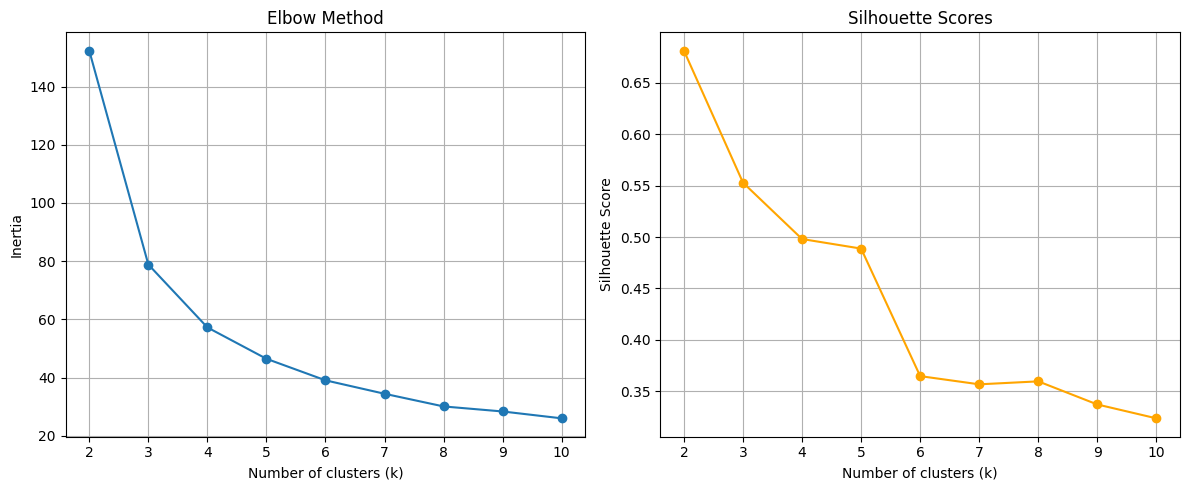

k = 2: Silhouette Score = 0.6810
k = 3: Silhouette Score = 0.5528
k = 4: Silhouette Score = 0.4981
k = 5: Silhouette Score = 0.4887
k = 6: Silhouette Score = 0.3648
k = 7: Silhouette Score = 0.3569
k = 8: Silhouette Score = 0.3597
k = 9: Silhouette Score = 0.3373
k = 10: Silhouette Score = 0.3238


In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Test k values from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=0)
    kmeans.fit(X)
    
    # Append inertia and silhouette score
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting the elbow method
plt.figure(figsize=(12, 5))

# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()

plt.tight_layout()
plt.show()

# Print performance measures
for k, score in zip(k_values, silhouette_scores):
    print(f'k = {k}: Silhouette Score = {score:.4f}')


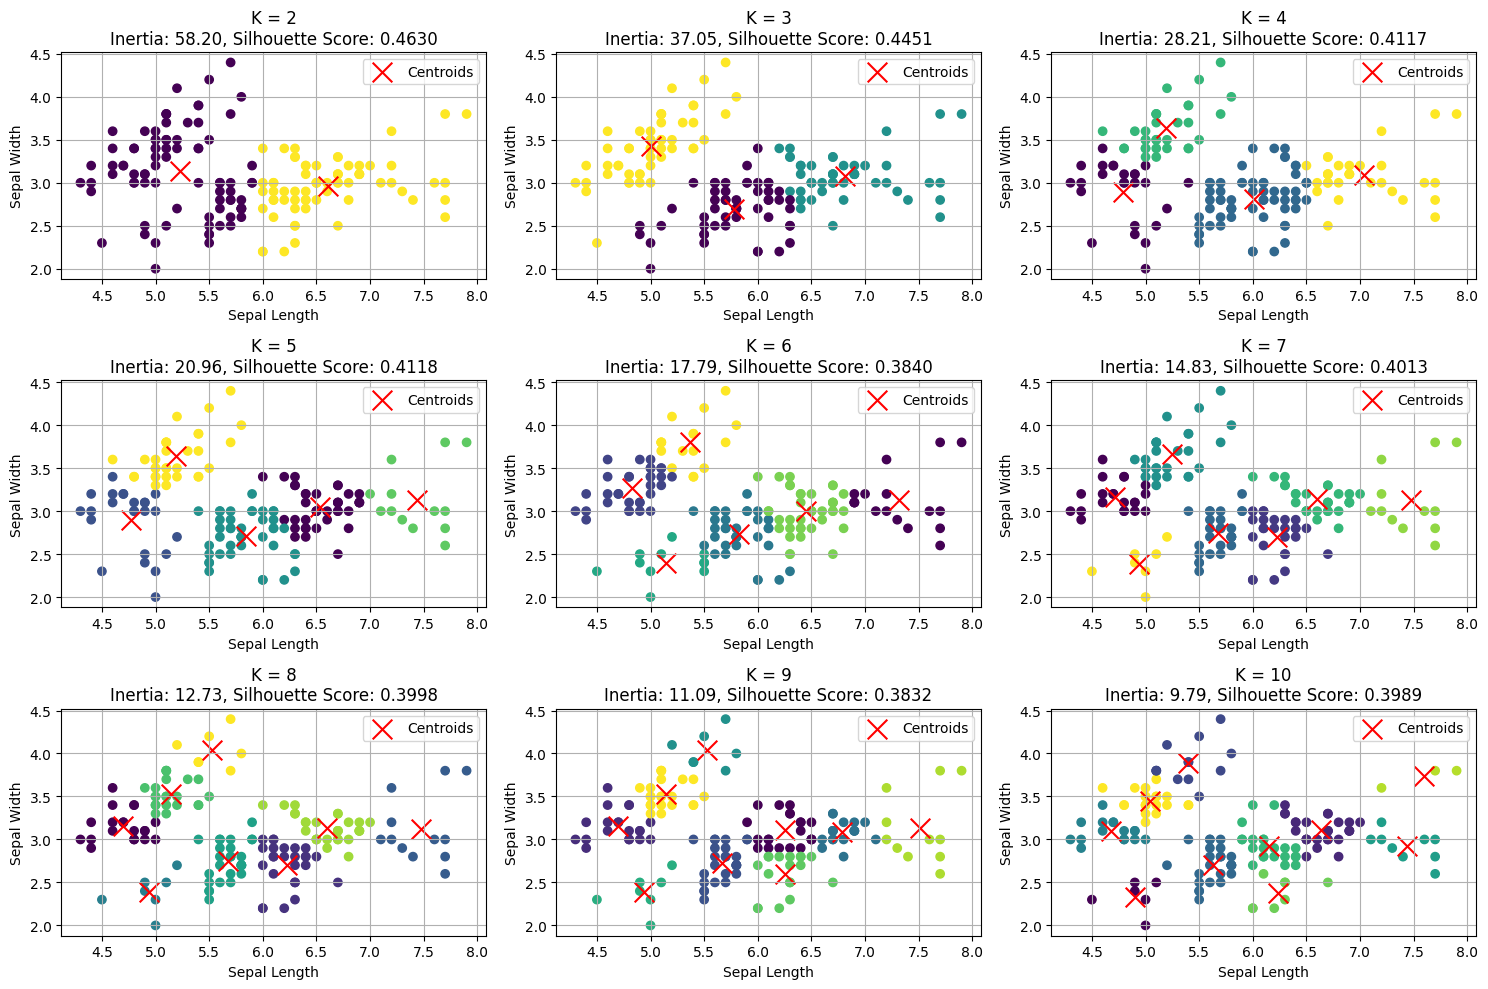

k = 2: Inertia = 58.20, Silhouette Score = 0.4630
k = 3: Inertia = 37.05, Silhouette Score = 0.4451
k = 4: Inertia = 28.21, Silhouette Score = 0.4117
k = 5: Inertia = 20.96, Silhouette Score = 0.4118
k = 6: Inertia = 17.79, Silhouette Score = 0.3840
k = 7: Inertia = 14.83, Silhouette Score = 0.4013
k = 8: Inertia = 12.73, Silhouette Score = 0.3998
k = 9: Inertia = 11.09, Silhouette Score = 0.3832
k = 10: Inertia = 9.79, Silhouette Score = 0.3989


In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features (Sepal Length and Sepal Width)

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Test k values from 2 to 10

# Create a figure for plotting
plt.figure(figsize=(15, 10))

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)

    # Append inertia and silhouette score
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # Scatter plot for the current k
    plt.subplot(3, 3, idx + 1)  # Create a subplot for each k
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='r', label='Centroids')
    plt.title(f'K = {k}\nInertia: {kmeans.inertia_:.2f}, Silhouette Score: {silhouette_scores[-1]:.4f}')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Print final inertia and silhouette scores
for k, inertia_val, silhouette_val in zip(k_values, inertia, silhouette_scores):
    print(f'k = {k}: Inertia = {inertia_val:.2f}, Silhouette Score = {silhouette_val:.4f}')
